Visualizations for Celebrity Attributes Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

p = Path('.')

df = pd.read_csv(p / 'celeba-dataset' / 'list_attr_celeba.csv')
df.drop(['image_id'], axis=1, inplace=True)
test_predictions = pd.read_csv(p / 'face_predictions_9003-10004.csv') # Predictions were saved for a small test set to more closely examine.

df.replace(-1, 0, inplace=True)
test_df = df[9003:10004]
percentages = df.mean() # With labels of 0 and 1, the mean gives a percentage of positive cases. For example, two 1s and one 0 would give .66 (66% positive.)

(array([3., 7., 4., 0., 3., 1., 2., 0., 3., 1., 3., 0., 3., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 3., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1.]),
 array([0.02244335, 0.04275576, 0.06306818, 0.08338059, 0.10369301,
        0.12400542, 0.14431784, 0.16463025, 0.18494267, 0.20525509,
        0.2255675 , 0.24587992, 0.26619233, 0.28650475, 0.30681716,
        0.32712958, 0.34744199, 0.36775441, 0.38806682, 0.40837924,
        0.42869165, 0.44900407, 0.46931648, 0.4896289 , 0.50994131,
        0.53025373, 0.55056614, 0.57087856, 0.59119097, 0.61150339,
        0.6318158 , 0.65212822, 0.67244063, 0.69275305, 0.71306546,
        0.73337788, 0.75369029, 0.77400271, 0.79431512, 0.81462754,
        0.83493996]),
 <a list of 40 Patch objects>)

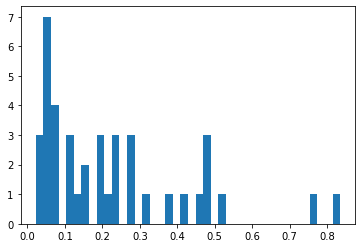

In [2]:
plt.hist(percentages, len(percentages)) # The majority of the features are positive in less than 20% of the samples.

In [3]:
print(percentages.sort_values())

Bald                   0.022443
Mustache               0.041545
Gray_Hair              0.041950
Pale_Skin              0.042947
Double_Chin            0.046688
Wearing_Hat            0.048460
Blurry                 0.050899
Sideburns              0.056511
Chubby                 0.057567
Goatee                 0.062764
Eyeglasses             0.065119
Rosy_Cheeks            0.065721
Wearing_Necktie        0.072715
Receding_Hairline      0.079778
5_o_Clock_Shadow       0.111136
Narrow_Eyes            0.115149
Wearing_Necklace       0.122967
Bushy_Eyebrows         0.142168
Blond_Hair             0.147992
Bangs                  0.151575
Wearing_Earrings       0.188925
Bags_Under_Eyes        0.204572
Brown_Hair             0.205194
Straight_Hair          0.208402
Big_Nose               0.234532
Black_Hair             0.239251
Big_Lips               0.240796
Arched_Eyebrows        0.266981
Pointy_Nose            0.277445
Oval_Face              0.284143
Wavy_Hair              0.319567
Heavy_Ma

In [2]:
test_percentages = test_predictions.mean()
print(test_percentages.sort_values())

Double_Chin              0.073336
Gray_Hair                0.077253
Wearing_Hat              0.086907
Sideburns                0.089536
Bald                     0.091956
Eyeglasses               0.098574
Blurry                   0.098887
Mustache                 0.099359
Rosy_Cheeks              0.100095
Pale_Skin                0.105001
Chubby                   0.105895
Wearing_Necktie          0.117295
Receding_Hairline        0.117660
Goatee                   0.119981
5_o_Clock_Shadow         0.130902
Narrow_Eyes              0.150759
Blond_Hair               0.156317
Bangs                    0.161415
Bushy_Eyebrows           0.166621
Wearing_Necklace         0.173551
Bags_Under_Eyes          0.197280
Wearing_Earrings         0.208195
Big_Nose                 0.213204
Big_Lips                 0.234789
Black_Hair               0.235912
Straight_Hair            0.239845
Oval_Face                0.246226
Arched_Eyebrows          0.249401
Brown_Hair               0.252391
Pointy_Nose   

In [3]:
test_df_percentages = test_df.mean()
comparison = test_df_percentages / test_percentages
print(comparison.sort_values())

# These are the ratios for the mean features in the test samples compared to their average prediction.
# A number close to 1 represents predictions that are similar to the actual distribution.
# A high number means the category was too often marked 0 (false negatives).
# A low number means the category was marked 1 too often (false positives).

Bald                   0.304188
Mustache               0.341852
Wearing_Hat            0.390831
Pale_Skin              0.409110
Chubby                 0.537729
Goatee                 0.541212
Blurry                 0.575837
Wearing_Necklace       0.587135
Eyeglasses             0.608072
Gray_Hair              0.620713
Sideburns              0.624823
Receding_Hairline      0.628301
Wearing_Necktie        0.655809
Double_Chin            0.735605
Rosy_Cheeks            0.758521
Brown_Hair             0.799545
Narrow_Eyes            0.821685
Wearing_Earrings       0.858912
5_o_Clock_Shadow       0.900534
Bangs                  0.903596
Bushy_Eyebrows         0.911341
Straight_Hair          0.941334
Pointy_Nose            0.948159
Wavy_Hair              0.952031
Arched_Eyebrows        0.965352
Blond_Hair             0.977803
Big_Lips               0.987133
Heavy_Makeup           1.014733
Wearing_Lipstick       1.038205
Black_Hair             1.050190
Attractive             1.082448
Mouth_Sl

In [28]:
print(np.mean(df.Goatee & df.No_Beard)) # I expect that some categories should have nearly 0 overlap. My intuition could be wrong as I don't have the criteria for how the data was labeled.

0.0010760171570442104


In [5]:
overlap = {}
for col in df:
    for other_col in df:
        if col != other_col:
            # Display the overall percentage of entries that are 1 in both columns.
            overlap[f'{col} == {other_col}'] = np.mean(df[f'{col}'] & df[f'{other_col}'])

for columns, means in overlap.items():
    if means > 0.40:
        print(columns, ":", means)
    else:
        pass

Attractive == No_Beard : 0.46458768305865283
Attractive == Young : 0.4775887343965173
High_Cheekbones == No_Beard : 0.41494775393758115
Mouth_Slightly_Open == No_Beard : 0.41949861549168554
No_Beard == Attractive : 0.46458768305865283
No_Beard == High_Cheekbones : 0.41494775393758115
No_Beard == Mouth_Slightly_Open : 0.41949861549168554
No_Beard == Smiling : 0.4234275588724525
No_Beard == Wearing_Lipstick : 0.47202108598759124
No_Beard == Young : 0.6643517490214661
Smiling == No_Beard : 0.4234275588724525
Wearing_Lipstick == No_Beard : 0.47202108598759124
Wearing_Lipstick == Young : 0.41809683167241696
Young == Attractive : 0.4775887343965173
Young == No_Beard : 0.6643517490214661
Young == Wearing_Lipstick : 0.41809683167241696


In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(df, df)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

ValueError: multilabel-indicator is not supported